# 8주 실습

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn

C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kyy80\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## 네이버 영화 리뷰 데이터 세트

In [2]:
df_train = pd.read_csv("D:/학교/4학년/빅데이터분석실습/8주차/data/ratings_train.txt", delimiter = '\t',keep_default_na = False)
df_train.head(n=3)


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [3]:
text_train, y_train = df_train['document'].values, df_train['label'].values


In [4]:
df_test = pd.read_csv("D:/학교/4학년/빅데이터분석실습/8주차/data/ratings_test.txt", delimiter = '\t', keep_default_na = False)

text_test, y_test = df_train['document'].values, df_train['label'].values

In [5]:
len(text_train), np.bincount(y_train)

(150000, array([75173, 74827], dtype=int64))

In [6]:
len(text_test), np.bincount(y_test)

(150000, array([75173, 74827], dtype=int64))

### KoNLPy의 Okt

In [8]:
from konlpy.tag import Okt
okt_tag = Okt()

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [ ]:
def okt_tokenizer(text):
    return okt_tag.morphs(text)

### 매개변수를 위한 그리드 서치

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

okt_param_grid = {'tfidfvectorizer__min_df': [3, 5, 7],
                  'tfidfvectorizer__ngram_range' : [(1, 1), (1, 2), (1, 3)],
                  'logisticregression__C': [0.1, 1, 10]}

okt_pipe = make_pipeline(TfidfVectorizer(tokenizer = okt_tokenizer),
                         LogisticRegression(solver = 'liblinear'))

okt_grid = GridSearchCV(okt_pipe, okt_param_grid, cv=3)

okt_grid.fit(text_train[0:2000], y_train[0:2000])

print("최상의 교차 검증 점수: {:.2f}".format(okt_grid.best_score_))
print("최적의 교차 검증 매개변수 : ", okt_grid.best_params_)
                                                                          

최상의 교차 검증 점수: 0.73
최적의 교차 검증 매개변수 :  {'logisticregression__C': 1, 'tfidfvectorizer__min_df': 3, 'tfidfvectorizer__ngram_range': (1, 1)}


In [12]:
X_test_okt = okt_grid.best_estimator_.named_steps["tfidfvectorizer"].transform(text_test)
score = okt_grid.best_estimator_.named_steps["logisticregression"].score(X_test_okt, y_test)

print("평가용 세트 점수:{:.2f}".format(score))

평가용 세트 점수:0.75


## 제약회사 데이터 분석

In [21]:
customer = pd.read_csv("D:/학교/4학년/빅데이터분석실습/8주차/data/customer_data.csv", encoding="cp949")
customer.head(n=5)


,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


### 피처값 추출

#### Okt import 및 선언

In [22]:
from konlpy.tag import Okt
okt_tag = Okt()

In [23]:
def tokenize(text):
    stems = []
    tagged = okt_tag.pos(text)
    for i in range(0, len(tagged)):
        if (tagged[i][1] == 'Noun' or tagged[i][1] == 'Adjective'):
            stems.append(tagged[i][0])
    return stems

In [24]:
tagged = okt_tag.pos(customer['Review'][0])
for i in range(0, len(tagged)):
    if(tagged[i][1] == 'Noun'):
        print(tagged[i])

('데', 'Noun')
('일리', 'Noun')
('신청', 'Noun')
('적', 'Noun')
('부터', 'Noun')
('고기', 'Noun')
('인스턴트', 'Noun')
('음식', 'Noun')
('장', 'Noun')
('상태', 'Noun')
('더욱', 'Noun')
('업무', 'Noun')
('스트레스', 'Noun')
('또한', 'Noun')
('것', 'Noun')
('체험', 'Noun')
('신청', 'Noun')
('보고', 'Noun')
('장', 'Noun')
('경험', 'Noun')
('보고', 'Noun')


In [25]:
tagged = okt_tag.pos(customer['Review'][0])
print(tagged)

[('안녕하세요', 'Adjective'), ('.', 'Punctuation'), ('데', 'Noun'), ('일리', 'Noun'), ('신청', 'Noun'), ('해', 'Verb'), ('봅니다', 'Verb'), ('.', 'Punctuation'), ('어렸을', 'Verb'), ('적', 'Noun'), ('부터', 'Noun'), ('장이', 'Suffix'), ('좋지', 'Adjective'), ('않았는데', 'Verb'), ('고기', 'Noun'), ('인스턴트', 'Noun'), ('음식', 'Noun'), ('을', 'Josa'), ('좋아하다', 'Adjective'), ('보니', 'Verb'), ('장', 'Noun'), ('상태', 'Noun'), ('가', 'Josa'), ('더욱', 'Noun'), ('안좋아', 'Adjective'), ('졌어요', 'Verb'), ('.', 'Punctuation'), ('업무', 'Noun'), ('에', 'Josa'), ('지쳐', 'Verb'), ('스트레스', 'Noun'), ('또한', 'Noun'), ('심한', 'Adjective'), ('것', 'Noun'), ('같구요', 'Adjective'), ('.', 'Punctuation'), ('체험', 'Noun'), ('신청', 'Noun'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('빨리', 'Adverb'), ('먹어', 'Verb'), ('보고', 'Noun'), ('건강한', 'Adjective'), ('장', 'Noun'), ('을', 'Josa'), ('경험', 'Noun'), ('해', 'Verb'), ('보고', 'Noun'), ('싶어요', 'Verb'), ('^^', 'Punctuation')]


#### 문서 단어 행렬 구성

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_data_list = customer['Review'].astype(str).tolist()
text_data_arr = np.array([''.join(text)for text in text_data_list])

In [27]:
vectorizer = TfidfVectorizer(min_df=3, tokenizer = tokenize, norm="l2")
text_data = vectorizer.fit_transform(text_data_arr)

In [28]:
df_tfidf = pd.DataFrame(text_data.A, columns = vectorizer.get_feature_names())
df_tfidf.head()

,가게,가격,가구,가기,가까이,가끔,가도,가득,가려움,가루,...,힘들어하고,힘들어하네요,힘들어하는,힘들어하는것,힘들어하는데,힘들어하더라,힘들었어요,힘듭니다,힘찬,힝
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 데이터 시각화

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family = font_name)

#### 주소데이터

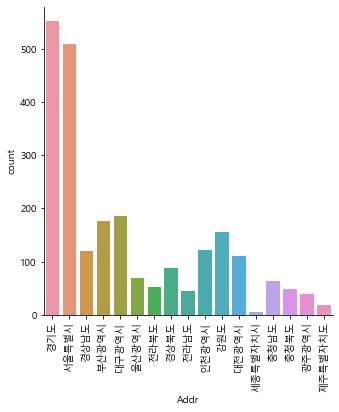

In [31]:
graph = sns.catplot('Addr', data = customer, kind = 'count', height = 5)
graph.set_xticklabels(rotation = 90)
graph.set_xlabels()

#### sns 데이터

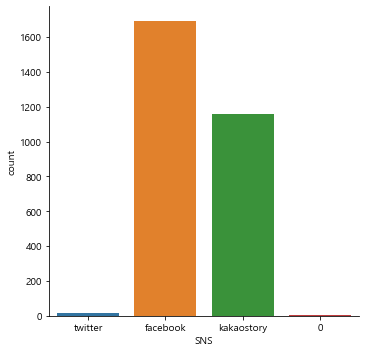

In [32]:
graph = sns.catplot ('SNS', data = customer, kind = 'count', height = 5)
graph.set_xlabels()

#### score 데이터

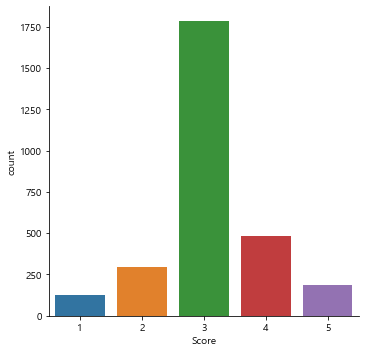

In [33]:
graph = sns.catplot ('Score', data = customer, kind = 'count', height = 5)
graph.set_xlabels()

##### 3점만 다른점수에 비해 차이가 많아 조정 필요

#### score데이터 조정

In [34]:
customer = customer.dropna (subset=['Score'])
customer.index = range(0, len(customer))
customer['Score2'] = ''

In [35]:
for i in range(0, len(customer)):
    if(customer['Score'][i] < 3):
        customer['Score2'][i] = 'bad'
    elif(customer['Score'][i] > 3):
        customer['Score2'][i] = 'good'
    elif(customer['Score'][i] == 3):
        customer['Score2'][i] = 'normal'
                 
customer

C:\Users\kyy80\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\kyy80\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kyy80\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good
...,...,...,...,...,...,...
2866,2866,3,"하루하루 반복되는 일과, 근무후 회식 및 거래처등과의 저녁약속으로 다음날이면 어김없...",kakaostory,충청북도,normal
2867,2867,2,장이 건강하면 만사가 편하다 해서~,facebook,서울특별시,bad
2868,2868,3,저희부모님이 건강이 좋지않아.. 부모님께한번 드려보고괜찮으면구매해볼까생각중입니다~ ...,facebook,NaN,normal
2869,2869,3,저는 41살의 직장인겸 주부입니다. 15살 중2딸도 함께 체험을 신청합니다. 변비가...,kakaostory,경상북도,normal


#### score 수정 후 시각화

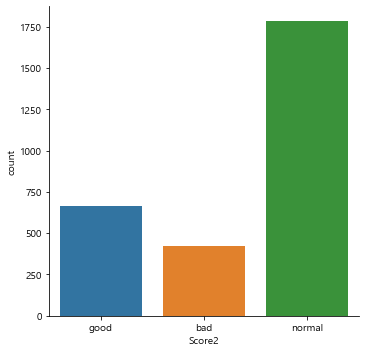

In [36]:
graph = sns.catplot('Score2', data = customer, kind = 'count', height = 5)
graph.set_xlabels()

#### 수정된 데이터 세트 저장

In [37]:
customer.to_csv("D:/학교/4학년/빅데이터분석실습/8주차/data/customer_data(filtered)_generated.csv", index = False)

#### 고객 sns의 분류 모델 작성

In [38]:
df = pd.read_csv("D:/학교/4학년/빅데이터분석실습/8주차/data/customer_data(filtered)_generated.csv")
df.head()

,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


#### 데이터를 리스트 형식으로 변형

In [39]:
text_data = df['Review'].astype(str).tolist()
text_label = df['Score'].astype(str).tolist()

#### 학습데이터와 평가데이터 세트 구분

In [40]:
trainset_size = int(round(len(text_data)*0.75))
X_train = np.array([''.join(data) for data in text_data [0:trainset_size]])
y_train = np.array ([data for data in text_label [0:trainset_size]])

X_test = np.array([''.join(data) for data in text_data [trainset_size+1 : len(text_data)]])
y_test = np.array ([data for data in text_label[trainset_size+1 : len(text_data)]])



#### 문서 단어 행렬 생성(모델 평가 준비)

In [41]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

#### 성능 평가 준비

In [43]:
df_per = pd.DataFrame(columns = ['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#### Naive Bayes 알고리즘 적용

In [47]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB().fit(X_train , y_train)
nb_pred = nb_classifier.predict(X_test)

In [49]:
print("\n Confusion Matrix \n")
print(confusion_matrix(y_test, nb_pred))
print("\n Classification Report \n")
print(classification_report(y_test, nb_pred))
print("\n Accuracy \n")
print(round(accuracy_score(y_test, nb_pred, normalize=True),2))


 Confusion Matrix 

[[  0   0  30   0   0]
 [  0   0  53   0   0]
 [  0   0 507   1   0]
 [  0   0  88  10   0]
 [  0   0  28   0   0]]

 Classification Report 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        30
           2       0.00      0.00      0.00        53
           3       0.72      1.00      0.84       508
           4       0.91      0.10      0.18        98
           5       0.00      0.00      0.00        28

    accuracy                           0.72       717
   macro avg       0.33      0.22      0.20       717
weighted avg       0.63      0.72      0.62       717


 Accuracy 

0.72
